# Project - Identify Data

![Data Science Workflow](img/ds-workflow.png)

## Goal of Project
- World population growth rate
- Is the growth rate stable? Increasing or Declining?

## Step 1: Acquire
- Explore problem
- Identify data
- Import data

### Step 1.a: Explore and understand problem
- What data do we need to answer the problem?

### Step 1.b: Indentify data with world population
- There are multiple sources
- World bank: https://data.worldbank.org/indicator/SP.POP.TOTL
- Wiki: https://en.wikipedia.org/wiki/World_population
- ...and probably more


### Step 1.c: Download and import the data
- We will download it from World Bank

### Step 1.d: Import libraries
- Execute the cell below (SHIFT + ENTER)

In [104]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

### Step 1.e: Read the data
- Use ```pd.read_csv()``` to read the file `files/API_SP/API_SP.POP.TOTL_DS2_en_csv_v2_3158886.csv`
- NOTE: Remember to assign the result to a variable (e.g., ```data```)
- HELP: You might need to `skiprows=4`
- Apply ```.head()``` on the data to see all is as expected

In [105]:
data = pd.read_csv('files/API_SP/API_SP.POP.TOTL_DS2_en_csv_v2_4898931.csv', skiprows=4)

In [106]:
data.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,Unnamed: 66
0,Aruba,ABW,"Population, total",SP.POP.TOTL,54608.0,55811.0,56682.0,57475.0,58178.0,58782.0,...,102880.0,103594.0,104257.0,104874.0,105439.0,105962.0,106442.0,106585.0,106537.0,NaN
1,Africa Eastern and Southern,AFE,"Population, total",SP.POP.TOTL,130692579.0,134169237.0,137835590.0,141630546.0,145605995.0,149742351.0,...,567891875.0,583650827.0,600008150.0,616377331.0,632746296.0,649756874.0,667242712.0,685112705.0,702976832.0,NaN
2,Afghanistan,AFG,"Population, total",SP.POP.TOTL,8622466.0,8790140.0,8969047.0,9157465.0,9355514.0,9565147.0,...,31541209.0,32716210.0,33753499.0,34636207.0,35643418.0,36686784.0,37769499.0,38972230.0,40099462.0,NaN
3,Africa Western and Central,AFW,"Population, total",SP.POP.TOTL,97256290.0,99314028.0,101445032.0,103667517.0,105959979.0,108336203.0,...,387204553.0,397855507.0,408690375.0,419778384.0,431138704.0,442646825.0,454306063.0,466189102.0,478185907.0,NaN
4,Angola,AGO,"Population, total",SP.POP.TOTL,5357195.0,5441333.0,5521400.0,5599827.0,5673199.0,5736582.0,...,26147002.0,27128337.0,28127721.0,29154746.0,30208628.0,31273533.0,32353588.0,33428486.0,34503774.0,NaN


### Step 1.f: Get world data
- We are only insterested in data for the world.
- The data can be identified by `Country Name` (World) or `Country Code` (WLD).
- This can be done as follows:
```Python
data[data['Country Name'] == 'World']
```
- NOTE: Remember to keep data

In [107]:
dataset = data[data['Country Name'] == 'World']

In [108]:
dataset.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,Unnamed: 66
259,World,WLD,"Population, total",SP.POP.TOTL,3.031565e+09,3.072511e+09,3.126935e+09,3.193509e+09,3.260518e+09,3.328285e+09,...,7.229185e+09,7.317509e+09,7.404911e+09,7.491934e+09,7.578158e+09,7.661776e+09,7.742682e+09,7.820982e+09,7.888409e+09,NaN


## Step 2: Prepare
- Explore data
- Visualize ideas
- Cleaning data

### Step 2.a: Check the data types
- This step tells you if some numeric column is not represented numeric.
- Get the data types by ```.dtypes```

In [109]:
dataset.dtypes

Country Name       object
Country Code       object
Indicator Name     object
Indicator Code     object
1960              float64
                   ...   
2018              float64
2019              float64
2020              float64
2021              float64
Unnamed: 66       float64
Length: 67, dtype: object

### Step 2.b: Keep only needed columns
- We are only interested in the year columns.
- You can drop the other columns by: ```.drop(list_of_columns_to_delete, axis='columns')```
- Notice there is a `unnamed` column.
    - Remove it with `dataset.dropna(how='all', axis='columns')`

In [110]:
dataset = dataset.drop(['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code'], axis='columns')
dataset.head()

,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,Unnamed: 66
259,3.031565e+09,3.072511e+09,3.126935e+09,3.193509e+09,3.260518e+09,3.328285e+09,3.398561e+09,3.468457e+09,3.540255e+09,3.614669e+09,...,7.229185e+09,7.317509e+09,7.404911e+09,7.491934e+09,7.578158e+09,7.661776e+09,7.742682e+09,7.820982e+09,7.888409e+09,NaN


In [111]:
dataset = dataset.dropna(how='all', axis='columns')
dataset.head()

,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
259,3.031565e+09,3.072511e+09,3.126935e+09,3.193509e+09,3.260518e+09,3.328285e+09,3.398561e+09,3.468457e+09,3.540255e+09,3.614669e+09,...,7.140896e+09,7.229185e+09,7.317509e+09,7.404911e+09,7.491934e+09,7.578158e+09,7.661776e+09,7.742682e+09,7.820982e+09,7.888409e+09


### Step 2.c: Transpose data
- It makes sense to have years in the rows
- This can be done with `.transpose()`

In [112]:
dataset = dataset.transpose()
dataset.head()

,259
1960,3.031565e+09
1961,3.072511e+09
1962,3.126935e+09
1963,3.193509e+09
1964,3.260518e+09


### Step 2.d: Rename column
- The name 259 can be renamed as follows
- This can be done as follows
```.rename(columns={259:'World Population'})```

In [113]:
dataset = dataset.rename(columns={259:'World Population'})
dataset.head()

,World Population
1960,3.031565e+09
1961,3.072511e+09
1962,3.126935e+09
1963,3.193509e+09
1964,3.260518e+09


### Step 2.e: Visualize data
- This is done to check data quality
- You can plot the DataFrame with `.plot()`

<AxesSubplot:>

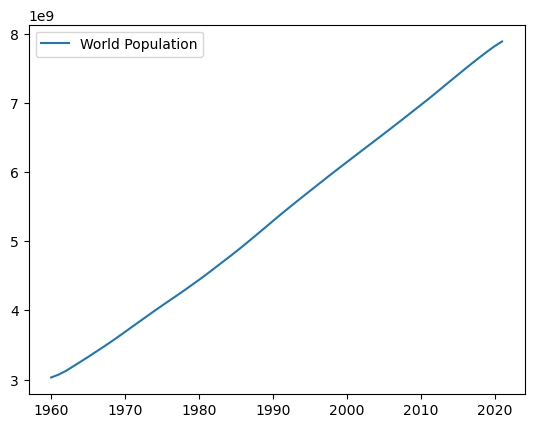

In [114]:
dataset.plot()

## Step 3: Analyze
- Feature selection
- Model selection
- Analyze data

### Step 3.a: Calculate yearly percentage change
- We want to explore the growth of the world population
- First step is to calculate the yearly growth
- This can be done with `pct_change()` ([docs](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.pct_change.html))
- Add a new column `Yearly growth` with the growth in percentage

In [115]:
dataset['Yearly Growth'] = dataset['World Population'].pct_change()

In [116]:
dataset.head()

,World Population,Yearly Growth
1960,3.031565e+09,NaN
1961,3.072511e+09,0.013506
1962,3.126935e+09,0.017713
1963,3.193509e+09,0.021291
1964,3.260518e+09,0.020983


### Step 3.b: Visualize the Yearly growth
- Plot it with `.plot()`
- This will give you an idea of the trend.

<AxesSubplot:>

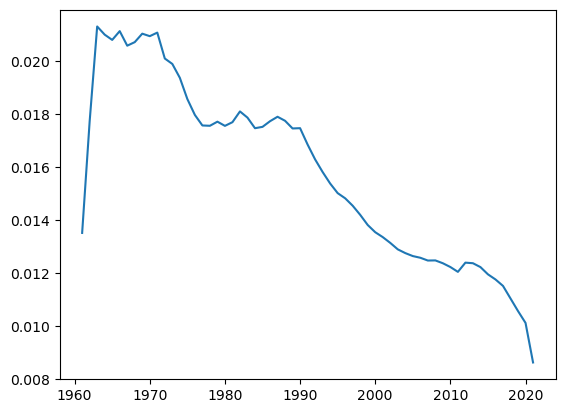

In [117]:
dataset['Yearly Growth'].plot()

### Step 3.c: Smooth the result
- A great way is to smooth the result
- This can show local tendencies
- Calculate a 10-years rolling average by using [rolling(10)](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.rolling.html).[mean()](https://pandas.pydata.org/docs/reference/api/pandas.core.window.rolling.Rolling.mean.html)
```Python
dataset['Yearly growth'].rolling(10).mean()
```
- Visualize the result
    - HINT: Make a plot containing `Yearly growth` and the new calculation.
- What does that tell you?

In [118]:
dataset['Smooth'] = dataset['Yearly Growth'].rolling(10).mean()

In [119]:
dataset.head()

,World Population,Yearly Growth,Smooth
1960,3.031565e+09,NaN,NaN
1961,3.072511e+09,0.013506,NaN
1962,3.126935e+09,0.017713,NaN
1963,3.193509e+09,0.021291,NaN
1964,3.260518e+09,0.020983,NaN


<AxesSubplot:>

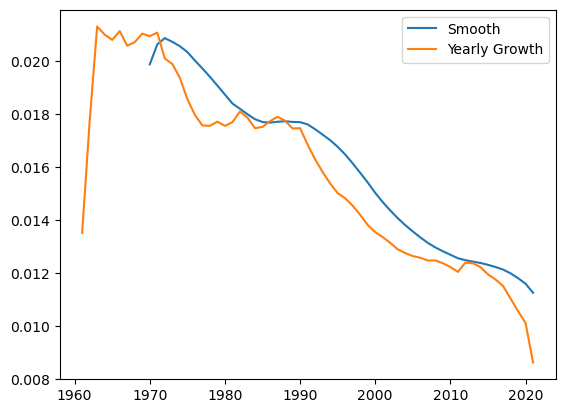

In [120]:
dataset[['Smooth', 'Yearly Growth']].plot()

## Step 4: Report
- Present findings
- Visualize results
- Credibility counts

### Step 4.a: Transform data
- To make plot more readable transform data to percentage
    - HINT: Multiply columns data `Yearly growth` and the smoothed data by 100

<AxesSubplot:>

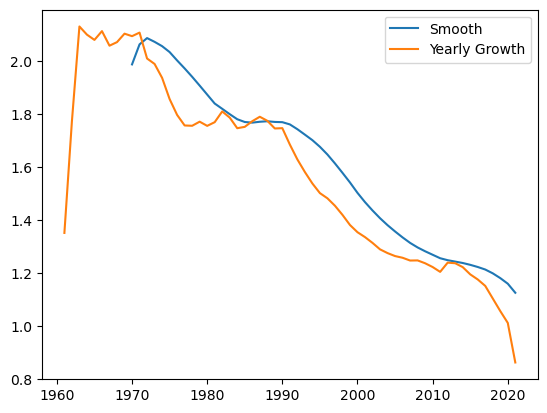

In [121]:
(dataset[['Smooth', 'Yearly Growth']]* 100).plot()

### Step 4.b: Set title and labels on axis
- In the plot set labels and axis
    - `xlabel='Year'` the same for `ylabel` and `title`

<AxesSubplot:title={'center':'world population'}, xlabel='Year', ylabel='Yearly Growth'>

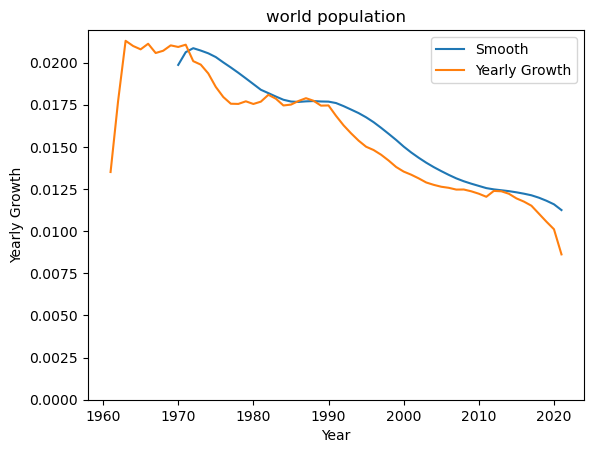

In [133]:
dataset[['Smooth', 'Yearly Growth']].plot(xlabel='Year', ylabel='Yearly Growth', title='world population', ylim=0)

### Step 4.c: Adding ranges on axis
- Add range on y-axis to make the plot more readable.
- Use `ylim=0`

## Step 5: Actions
- Use insights
- Measure impact
- Main goal

### Step 5.a
- Any insights to use?
- Do we need to make predictions based on it?

In [122]:
nigeria = data[data['Country Name'] == 'Nigeria']

In [123]:
nigeria = nigeria.drop(['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code'], axis='columns')
nigeria.head()

,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,Unnamed: 66
174,44928342.0,45855507.0,46821845.0,47822569.0,48856332.0,49925799.0,51020296.0,52106681.0,53210119.0,54360750.0,...,174726123.0,179379016.0,183995785.0,188666931.0,193495907.0,198387623.0,203304492.0,208327405.0,213401323.0,NaN


In [124]:
nigeria = nigeria.dropna(how='all', axis='columns')
nigeria.head()

,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
174,44928342.0,45855507.0,46821845.0,47822569.0,48856332.0,49925799.0,51020296.0,52106681.0,53210119.0,54360750.0,...,170075932.0,174726123.0,179379016.0,183995785.0,188666931.0,193495907.0,198387623.0,203304492.0,208327405.0,213401323.0


In [125]:
nigeria = nigeria.transpose()
nigeria.head()

,174
1960,44928342.0
1961,45855507.0
1962,46821845.0
1963,47822569.0
1964,48856332.0


In [126]:
nigeria = nigeria.rename(columns={174:'Nigeria Population'})
nigeria.head()

,Nigeria Population
1960,44928342.0
1961,45855507.0
1962,46821845.0
1963,47822569.0
1964,48856332.0


<AxesSubplot:>

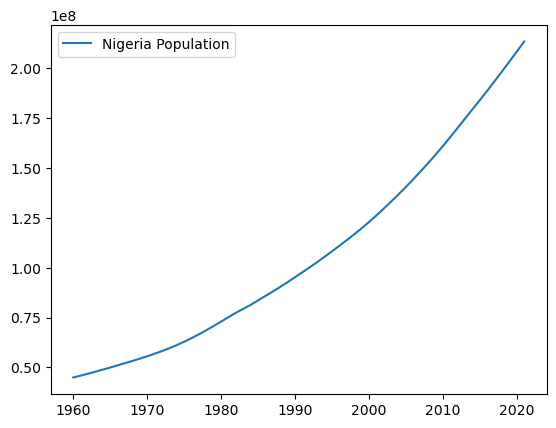

In [127]:
nigeria.plot()

In [128]:
nigeria['Yearly Growth'] = nigeria['Nigeria Population'].pct_change()

<AxesSubplot:>

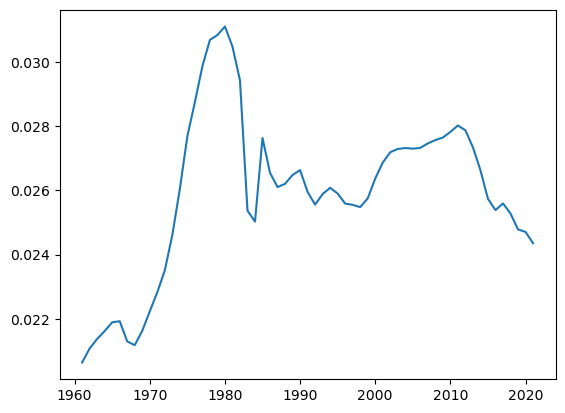

In [129]:
nigeria['Yearly Growth'].plot()

In [130]:
nigeria['Smooth'] = nigeria['Yearly Growth'].rolling(10).mean()

In [131]:
nigeria.head()

,Nigeria Population,Yearly Growth,Smooth
1960,44928342.0,NaN,NaN
1961,45855507.0,0.020637,NaN
1962,46821845.0,0.021074,NaN
1963,47822569.0,0.021373,NaN
1964,48856332.0,0.021617,NaN


<AxesSubplot:>

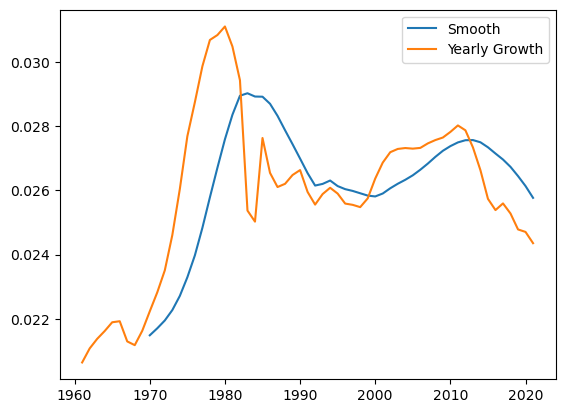

In [132]:
nigeria[['Smooth', 'Yearly Growth']].plot()

<AxesSubplot:title={'center':'Nigeria population'}, xlabel='Year', ylabel='Yearly Growth'>

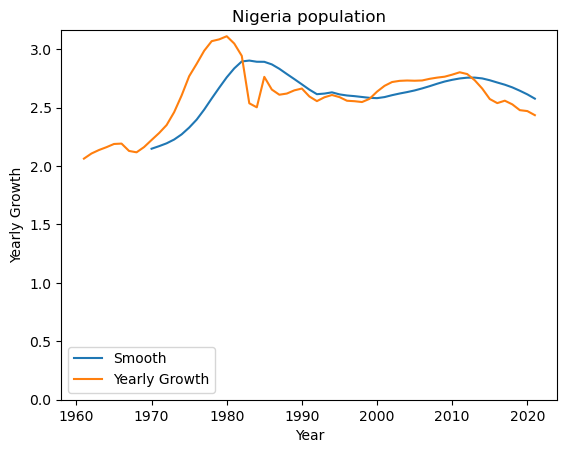

In [134]:
(nigeria[['Smooth', 'Yearly Growth']]*100).plot(xlabel='Year', ylabel='Yearly Growth', title='Nigeria population', ylim=0)